# ROI detection on text images

## Goal
The goal of this task is to detect interested regions of interests (ROIs) in images (printed text or written text). The ROIs will be provided for annotation classification (annotated or non-annotated image).

## Approachs
Steps to finish the ROIs detection:
1. Load an image into memory
2. Perform Image processing, e.g., grayscale
3. Configure an OCR Engine (e.g., Tesseract)
4. Apply the OCR Engine on the image to obtain a list of detection
5. Run the ROIs algorithm to obtain a list of refined ROIs (bounding box location, x,y,width,height)
6. Plot the bounding box and save the boxes into a corresponding txt file.

Several classes are needed in this work:
- Utils.py
- OCREngine.py
- ImgProcessor.py
- Plot.py

## Package configuration
- Python3.6
- Tessearct 3.05, leptonica-1.74.4, instructions:
    - a. overall: https://lucacerone.net/2017/install-tesseract-3-0-5-in-ubuntu-16-04/
    - b. download the english language package, tesseract-ocr-3.02.eng.tar.gz, and put them into /usr/local/share/tessdata
        - https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#cube-data-files-for-version-304305
- pyTesseract 0.2.0
- Ubuntu 14.04
- Pillow, "conda install pillow" for python3.6
- cv3 for python3.6, conda install -c menpo opencv3


In [1]:
%load_ext autoreload
%autoreload 2

from lib.ImgProcessor import ImgProcessor
import matplotlib.pyplot as plt
import numpy as np


# 1. Define the image
root_dir = './sample/positive'
fname = '30.png'
f = '%s/%s' % (root_dir,fname)


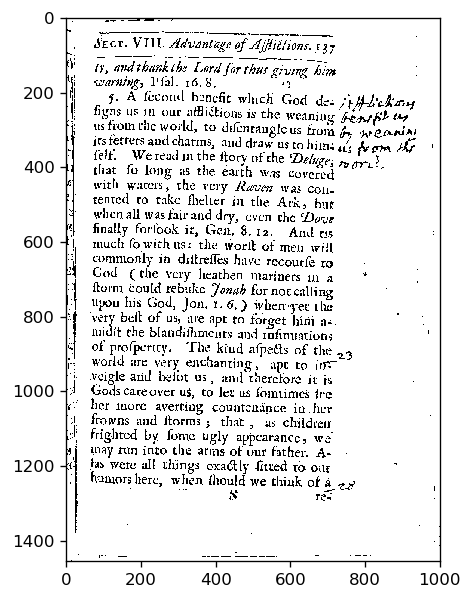

In [2]:
# 2. Load the image
imgProcessor = ImgProcessor()
img = imgProcessor.loadImage(inFilename=f)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

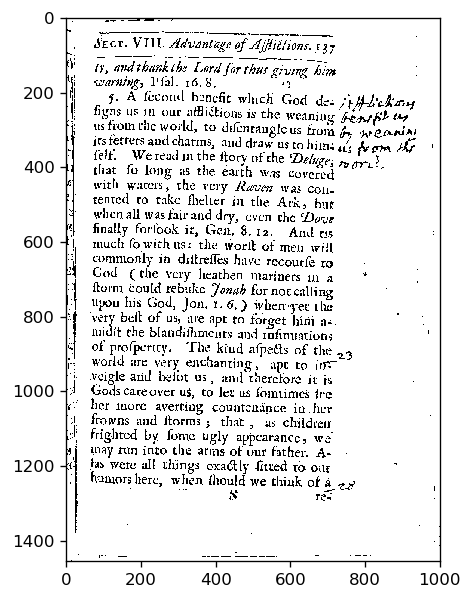

In [3]:
# 3. preprocess the image
img = imgProcessor.quickPreprocess(img)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

In [9]:
# ############################################
#
# 4. Load the tessearct engine
#
# ############################################

from lib.OCREngine import OCREngine

# define engine
ocr = OCREngine('tessearct')
# perform ocr
imgROIs, data_df = ocr.image_to_data(img)

# check
print(imgROIs[10].toString())



x:941	y:1356	width:18	height:18	text:	confidence:1.0	level:3	isAnnotation:False


In [5]:
# ############################################
#
# 4.1 Perform  Classification algorithm to:
#
# (1) Merge boxes (reduce redundant boxes) into line level
# (2) Do the straightforward classification algorithm
#     to determine if a bounding box is annotated or not.
#     Update hte ImageROI model class isAnnotation=True/False attribute
#
# ############################################

# TODO By Emily <-- just return a list of ImageROI after your algorithm, 
# e.g., [ImageROI1, ImageROI2, etc]



x:601	y:1439	width:29	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:65	y:1439	width:18	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:663	y:1438	width:26	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:756	y:1437	width:71	height:18	text:	confidence:1.0	level:3	isAnnotation:False
x:878	y:1436	width:22	height:18	text:	confidence:1.0	level:3	isAnnotation:False
x:857	y:1436	width:18	height:18	text:	confidence:1.0	level:3	isAnnotation:False
x:89	y:1430	width:487	height:25	text:	confidence:1.0	level:3	isAnnotation:False
x:655	y:1390	width:16	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:255	y:1375	width:18	height:18	text:	confidence:1.0	level:3	isAnnotation:False
x:982	y:1360	width:17	height:77	text:	confidence:1.0	level:3	isAnnotation:False
x:941	y:1356	width:18	height:18	text:	confidence:1.0	level:3	isAnnotation:False
x:162	y:1354	width:16	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:20	y:1322	width:27	height:129	text:	con

x:709	y:48	width:17	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:620	y:44	width:17	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:401	y:40	width:18	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:227	y:38	width:433	height:162	text:	confidence:1.0	level:3	isAnnotation:False
x:75	y:38	width:100	height:57	text:	confidence:1.0	level:3	isAnnotation:False
x:171	y:37	width:19	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:187	y:33	width:94	height:60	text:	confidence:1.0	level:3	isAnnotation:False
x:980	y:27	width:17	height:16	text:	confidence:1.0	level:3	isAnnotation:False
x:1	y:15	width:36	height:135	text:	confidence:1.0	level:3	isAnnotation:False
x:116	y:6	width:30	height:17	text:	confidence:1.0	level:3	isAnnotation:False
x:278	y:1	width:19	height:20	text:	confidence:1.0	level:3	isAnnotation:False
x:151	y:1	width:112	height:22	text:	confidence:1.0	level:3	isAnnotation:False
Number of ROIs plotted: 144


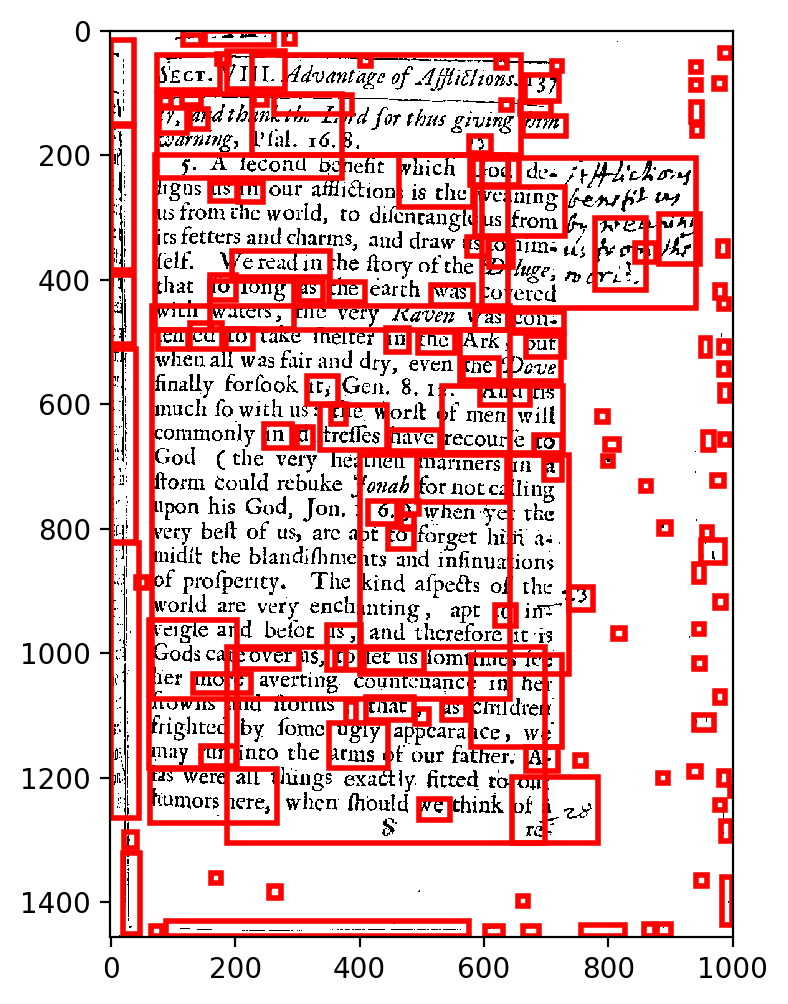

In [10]:
# ############################################
#
# 5. Plot the bounding boxes on the text image
#
# ############################################
from lib.utils.Utils import *
import pickle

# plot the rois and plot only certain information according to the set
roi_level_set = set([3])
plt_img(img, rois=[(imgROIs,'r')], roi_level_set=roi_level_set)

# save the plot
plt.savefig('./result/%s_boxes.png' %fname)

# save the bounding boxes to txt
save_rois(imgROIs,'./result/%s_imgROIs.txt' %fname)

# save the bounding boxes to pickle
with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
    pickle.dump(imgROIs,f)
